Matching concentration curves.

Date Created: 16 Apr 2019
<br>
Last Modified: 16 Apr 2019
<br>
Humans Responsible: The Prickly Pythons

In [1]:
%matplotlib inline

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
x = np.linspace(2,3.2,30)

In [85]:
# Model the concentration using a logistic curve.

k = 15
xc = 2.6

y_init = 1/(np.exp(k*(x-xc)) + 1)

In [91]:
# Jiggle the parameters around, in particular the central point xc.

k2 = 15 + np.random.rand()*1
xc_2 = 2.6 + np.random.rand()*0.1

y_meas = 1/(np.exp(k*(x-xc_2)) + 1)

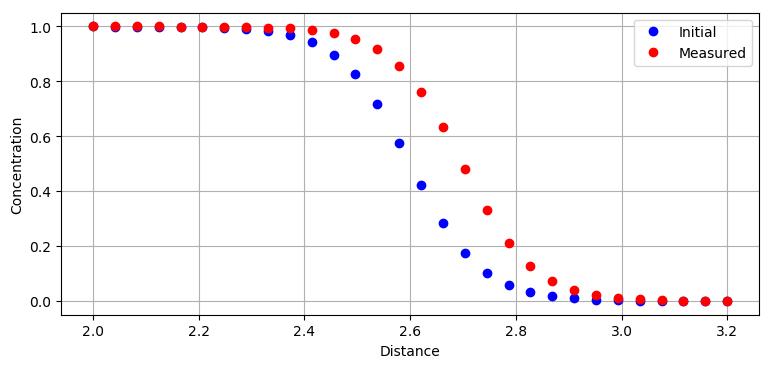

In [103]:
fig = plt.figure(figsize=(9,4))
plt.plot(x, y_init, 'bo', label='Initial')
plt.plot(x, y_meas, 'ro', label='Measured')

plt.xlabel('Distance')
plt.ylabel('Concentration')
plt.legend(loc='best')
plt.grid()

plt.show()

In [93]:
# Find the index of the closest point above the concentration of 0.5, using some funky numpy indexing.
gp5_init_ind = np.where(y_init > 0.5)[0][-1] # For the initial concentration
gp5_meas_ind = np.where(y_meas > 0.5)[0][-1] # For the measured concentration

# Find the index of the closest point below the concentration of 0.5. By default it would be the point 
# right after the point that is above the concentration of 0.5.
lp5_init_ind = gp5_init_ind + 1
lp5_meas_ind = gp5_meas_ind + 1

In [94]:
# Have a look
print(gp5_meas_ind)
print(lp5_meas_ind)
print(gp5_init_ind)
print(lp5_init_ind)

16
17
14
15


In [95]:
# Find the equation of the straight lines running through these pairs of points.

# Here are the gradient of the lines.
# m = (y0-y1)/(x0-x1)
m_meas = (y_meas[gp5_meas_ind] - y_meas[lp5_meas_ind]) / (x[gp5_meas_ind] - x[lp5_meas_ind])
m_init = (y_init[gp5_init_ind] - y_init[lp5_init_ind]) / (x[gp5_init_ind] - x[lp5_init_ind])

In [96]:
print(m_meas)
print(m_init)

-3.67013881414
-3.7201889911


In [97]:
# So the equations are:
# y = m_init*(x - x[gp5_init_ind]) + y_init[gp5_init_ind]
# y = m_meas*(x - x[gp5_meas_ind]) + y_meas[gp5_meas_ind]

In [98]:
# Now that we have the equations, plug 0.5 in both for y and solve for x

x_p5_init = (0.5 - y_init[gp5_init_ind])/m_init + x[gp5_init_ind]
x_p5_meas = (0.5 - y_meas[gp5_meas_ind])/m_meas + x[gp5_meas_ind]

In [99]:
print(x_p5_init)
print(x_p5_meas)

2.6
2.69837466357


In [100]:
# Take the difference and voila! - There is your shift.
x_shift = x_p5_init - x_p5_meas

In [101]:
print(x_shift)

-0.098374663571


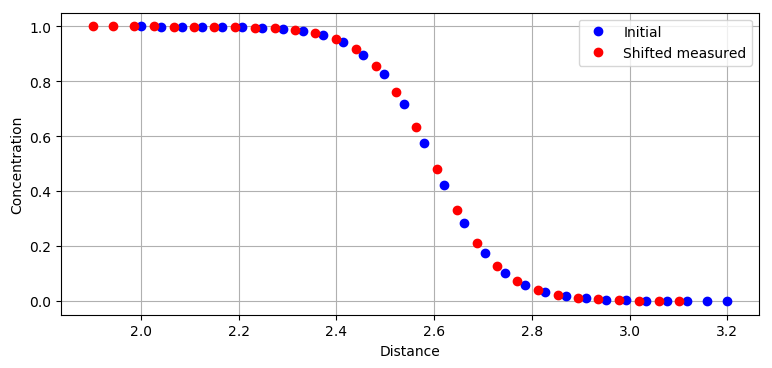

In [104]:
# Shift the curve and have a look.

fig = plt.figure(figsize=(9,4))
plt.plot(x, y_init, 'bo', label='Initial')
plt.plot(x+x_shift, y_meas, 'ro', label='Shifted measured')

plt.xlabel('Distance')
plt.ylabel('Concentration')
plt.legend(loc='best')
plt.grid()

plt.show()